# Overview of Week 3

This week's assignment consists of two parts. The first part gives you an introduction to unsupervised learning. In particular, we focus on techniques for clustering and dimensionality reduction and how they can be applied to ecommerce data. As you work through the three clustering case studies, you will find yourself generating many intermediate datasets, trying different models, and tuning each model as you go along. There's a lot to keep track of.   

This is where Part 2 comes in. It is in Part 2 that we introduce ideas of **workflow management** and **computational reproducibility**. Workflow management means organising your project directory to manage your analysis' artefacts (visualisations, processed datasets, notebooks and utility functions and experiment results). Ideally, your code for these should be clearly commented with well chosen names. Computational reproducibility means someone else (including future you!) being able to take just the code and data, and reproduce your project, from its results and models to visualisations etc. How one decides to practice workflow management and computational reproducibility can be quite a personal decision. Therefore, we provide guidelines, not rules. The most important is having a system rather than no system at all. 

**note about the week**   
While week 1's assignment was guided, with specific instructions about what code to run, as we move on the assignments will involve less hand-holding. For this week, we include some instructions, but leave the specific implementations up to you. There are also many techniques we cover. Again, while we share some resources, we leave the bulk of the research and background reading up to you to manage for yourself. As a record of how well you have synthesised your readings, this notebook has space for writing a few paragraphs of explanations. We hope you won't be content with a shallow explanation, and that you use this space to apply the [Feynmann technique](https://collegeinfogeek.com/feynman-technique/) as a check of understanding. 

To tie Part 1 and Part 2 of the week together, we are not just asking for one Jupyter Notebook as a final deliverable. Instead, there are four deliverables to the week: 

**1. Part 1 Notebook I and II exercises presented at the end of the week job-interview style**

**2. A script that automates the data cleaning and feature engineering steps you take so your findings are reproducible (see Part 2 Notebook I for more info)**

**3. A repo README.md (see Part 2 Notebook I for more info)**

**4  A record of software package versions and software environment used (see Part 2 Notebook I for more info)**   

**recap of the objectives for the first 6 weeks:**  
We aim to broadly cover a wide range of Machine Learning algorithms so that you can: 
- handle the technical demands of a 100E given some guidance on the right direction to take 
- can handle a technical job interview and get hired 

*materials for unsupervised learning adapted from William Thji* 

# Part I : Unsupervised Learning 
Unsupervised Learning refers to a set of machine learning techniques where no output variables (Y) are given. Only the input variables (X) are available and our job is to find patterns in X. You may read more about it from *pg 485 from Hastie and Tibshirani's Elements of Statistical Learning* available [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf). 

ESL by Hastie et. al with be the primary reference for this week, although feel free to source for your own books and links. 

## Short introduction to clustering 
Clustering puts datapoints into subsets so that datapoints within a cluster are more closely related to one another compared to datapoints in another cluster. More information is available from page 501 of *Elements of Statistical Learning*. 

Some quick points: 
- Clustering is extremely useful to many fields: 
    - Customer segmentation for personalised product recommendations
    - Topic identification to relieve the need to manually vet documents 
    - Image or geo-spatial segmentation to optimised supply and demand (Gojek does this) 
    - and maybe most importantly, getting a sense of the data before starting to model it. 

- Some examples of clustering algorithms: 
    - KMeans
    - Gaussian Mixture Models for drawing soft clustering boundaries instead of hard ones 
    - Hierarchical clustering
    - DBScan for density-based clustering for anomaly detection 
    - Co-clustering
    - Biclustering for analysing genes

## Deliverable 1: Complete the Clustering Case Study: Using PCA and clustering to uncover customer segments 
Context: The dataset we will be working with contains ecommerce transactions from a UK-based online retails store. The dataset is available on [Kaggle](https://www.kaggle.com/carrie1/ecommerce-data/home) or the UCI Machine Learning Repository. The dataset is quite small, so we have also included it inside the `data` folder inside this repo as `data/raw/data.csv`. 

From the Kaggle website: 

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Case Study Goal 
Cluster the dataset into meaningful customer segments. This means creating clusters that are statistically robust and that make business sense. 


In [10]:
import pandas as pd 
df = pd.read_csv('data/raw/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Cleaning data 

Some data types are muddled, there are duplicates, NA values and unreasonable values hiding in the columns 

1. Clean the dataset. You may want to list the steps taken to clean the data and encapsulate the steps inside their own functions so they can be reused. Organise the functions into their own library

In [12]:
from src.utils import Preprocess
preprocess = Preprocess()

In [13]:
df = preprocess.clean_ecommerce(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null object
Country        397924 non-null object
TotalPrice     397924 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


/Users/nus/Desktop/aiap_2.0_unsuperv_filled/src/utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['CustomerID'] = data['CustomerID'].str.slice(0,id_length-2)


In [17]:
df.to_csv('data/derived/data_cleaned.csv')

### Feature Engineering iteration #1 

Inside the dataset, each row contains information about an ecommerce transation. However, we want to cluster the data by customers, which means each row should instead contain information about a customer. 

1. Reshape the data to follow the format below: 
![alt text](customer.png)

The dataframe should have these columns: `['NoOfInvoices', 'NoOfUniqueItems', 'QuantityPerInvoice', 'TotalQuantity', 'UniqueItemsPerInvoice','UnitPriceMean','UnitPriceStd']` 
2. Save this dataset as an intermediate dataset 

In [14]:
def create_customer_data(data):
        """
        input df : clean Kaggle ecommerce dataframe
        output df: DataFrame with customers as rows
                    suitable for clustering
        """
        NoOfInvoices = data.groupby(['CustomerID'])['InvoiceNo'].nunique()
        NoOfUniqueItems = data.groupby(['CustomerID'])['StockCode'].nunique()
        QuantityPerInvoice = data.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum()
        MeanQuantityPerInvoice = QuantityPerInvoice.groupby(['CustomerID']).mean()
        SpendingPerInvoice = data.groupby(['CustomerID','InvoiceNo'])['TotalPrice'].sum()
        MeanSpendingPerInvoice = SpendingPerInvoice.groupby(['CustomerID']).mean()
        UniqueItemsPerInvoice = data.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique()
        MeanUniqueItemsPerInvoice = UniqueItemsPerInvoice.groupby(['CustomerID']).mean()
        UnitPriceMean = data.groupby(['CustomerID'])['UnitPrice'].mean()
        UnitPriceStd = data.groupby(['CustomerID'])['UnitPrice'].std()
        TotalQuantity = data.groupby(['CustomerID'])['Quantity'].sum()
        customer = pd.DataFrame({'NoOfInvoices':NoOfInvoices, 'NoOfUniqueItems':NoOfUniqueItems, 
                            'MeanQuantityPerInvoice':MeanQuantityPerInvoice,'MeanSpendingPerInvoice':MeanSpendingPerInvoice,
                            'MeanUniqueItemsPerInvoice':MeanUniqueItemsPerInvoice,'UnitPriceMean':UnitPriceMean, 'UnitPriceStd':UnitPriceStd,
                                 'TotalQuantity':TotalQuantity})
        customer = customer[~customer['UnitPriceStd'].isnull()]
        return customer

In [15]:
customer = create_customer_data(df)
customer.head()

,NoOfInvoices,NoOfUniqueItems,MeanQuantityPerInvoice,MeanSpendingPerInvoice,MeanUniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd,TotalQuantity
CustomerID,,,,,,,,
12347,7,103,351.142857,615.714286,26.000,2.644011,2.255381,2458
12348,4,22,585.250000,449.310000,6.750,5.764839,13.400323,2341
12349,1,73,631.000000,1757.550000,73.000,8.289041,35.028021,631
12350,1,17,197.000000,334.400000,17.000,3.841176,9.334751,197
12352,8,59,67.000000,313.255000,10.375,15.930706,53.706324,536


In [18]:
customer.to_csv('data/derived/customer.csv')

### Hierarchical clustering iteration #1 [reference pg 520](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. Implement any more preprocessing or visualisation steps you feel are necessary to understand how you might build meaningful clusters from the data. 
2. Apply hierarchical clustering to the dataset. 
2. Experiment with different linkage algorithms. Visualise the resulting trees for average linkage, complete linkage and single linkage side-by-side. Which linkage algorithm works best? 
3. List two ways to improve the clustering and implement at least one. Track the results of the first iteration and second iteration (whether with Excel, TextEdit or within this notebook itself). 
4. Describe the clusters you selected and evaluate whether or not they form meaningful segments. 

In [20]:
# Standardise data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
customer_norm = scale.fit_transform(customer)
customer_norm = pd.DataFrame(customer_norm, columns=customer.columns, index=customer.index)
customer_norm.head()

,NoOfInvoices,NoOfUniqueItems,MeanQuantityPerInvoice,MeanSpendingPerInvoice,MeanUniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd,TotalQuantity
CustomerID,,,,,,,,
12347,0.344549,0.472431,0.167434,0.154502,0.217565,-0.097125,-0.113427,0.255066
12348,-0.042174,-0.472664,0.511017,0.033545,-0.793114,0.188785,0.477738,0.231516
12349,-0.428896,0.122396,0.578161,0.984487,2.685196,0.420035,1.624943,-0.112674
12350,-0.428896,-0.531003,-0.058790,-0.049982,-0.254961,0.012552,0.262087,-0.200029
12352,0.473456,-0.040954,-0.249582,-0.065352,-0.602792,1.120114,2.615702,-0.131795


In [22]:
customer_norm.to_csv('data/derived/customer_norm.csv')

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
#sns.pairplot(customer_norm)

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

complete = linkage(customer_norm, "complete")
average = linkage(customer_norm, "average")
single = linkage(customer_norm, "single")

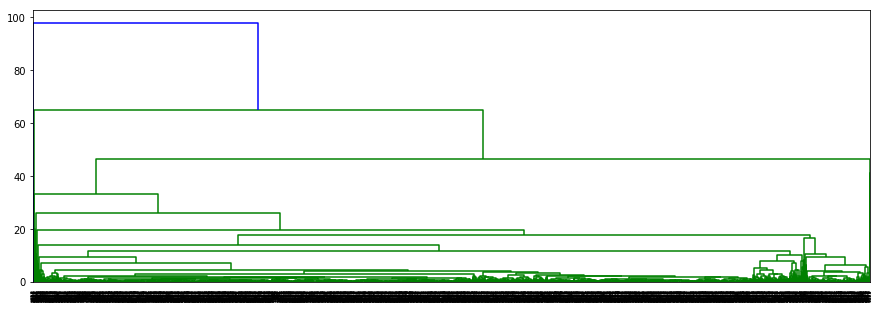

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
ax = dendrogram(complete)
plt.show()

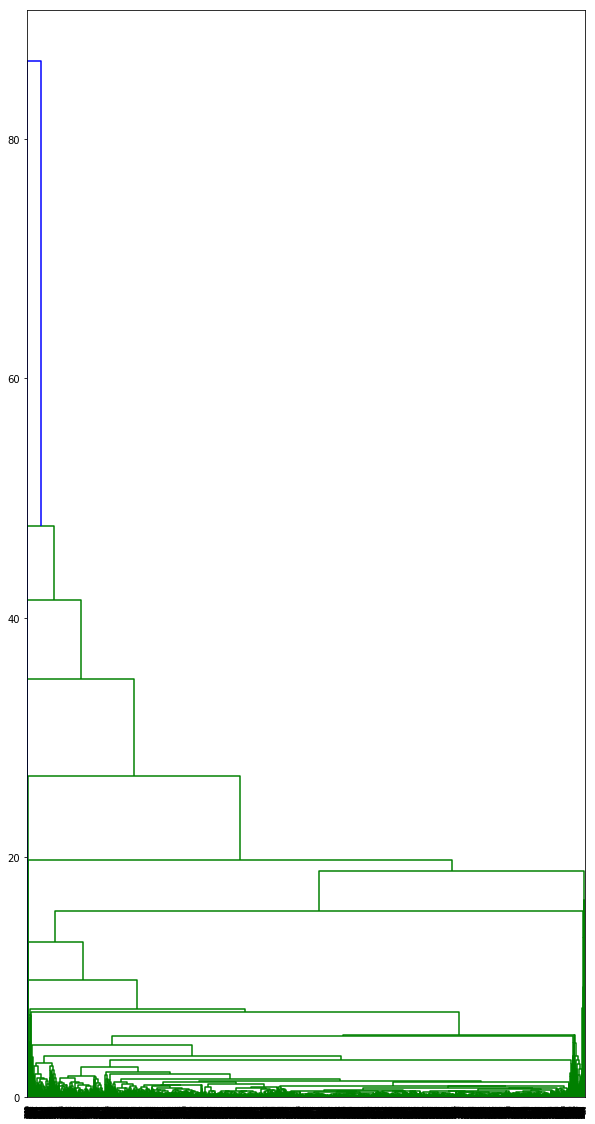

In [55]:
fig, ax = plt.subplots(figsize=(10,20))
ax = dendrogram(average)
plt.show()

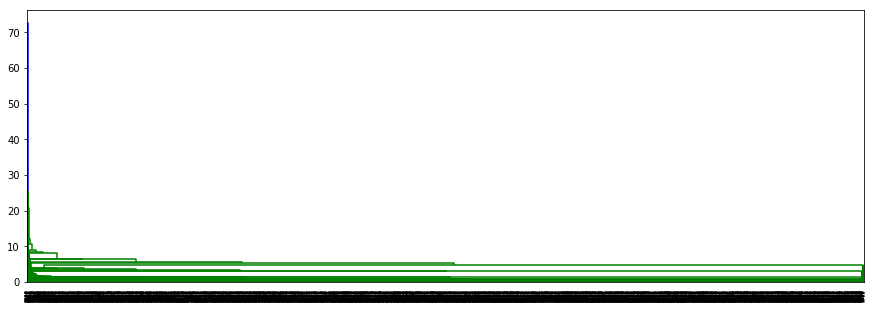

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
ax = dendrogram(single)
plt.show()

### K-means and GMM Clustering iteration #1 [reference pg 509](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
Apart from hierarchical clustering, we can also apply KMeans and Gaussian Mixture Models (GMM) on the data

1. Implement K-means clustering on the data, experimenting with different values of k 
2. Implement a Gaussian Mixture Model on the data, experimenting with different values for the number of components.  
3. Visualise how well K-means and GMMs succeed at separating subgroups in the data
4. List two ways to improve the clustering and implement at least one. 
5. Describe the clusters and evaluate whether or not they form meaningful segments. 

In [106]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

customer_km_sil = np.empty(10)
customer_gmm_sil = np.empty(10)
for i in range(2,11):
    km = KMeans(n_clusters=i)
    gmm = GaussianMixture(n_components=i, max_iter=1000)
    customer_km = km.fit(customer_norm)
    customer_km_sil[i-2] = silhouette_score(customer_norm, customer_km.labels_)    
    customer_gmm = gmm.fit(customer_norm)
    customer_gmm_sil[i-2] = silhouette_score(customer_norm, customer_gmm.predict(customer_norm))

In [112]:
customer_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4267 entries, 12347 to 18287
Data columns (total 8 columns):
NoOfInvoices                 4267 non-null float64
NoOfUniqueItems              4267 non-null float64
MeanQuantityPerInvoice       4267 non-null float64
MeanSpendingPerInvoice       4267 non-null float64
MeanUniqueItemsPerInvoice    4267 non-null float64
UnitPriceMean                4267 non-null float64
UnitPriceStd                 4267 non-null float64
TotalQuantity                4267 non-null float64
dtypes: float64(8)
memory usage: 460.0+ KB


### Outliers 

1. Do outliers influence the results of your Hierarchical Clustering, K-means and GMM models?  
2. Do the outliers themselves form clusters? 

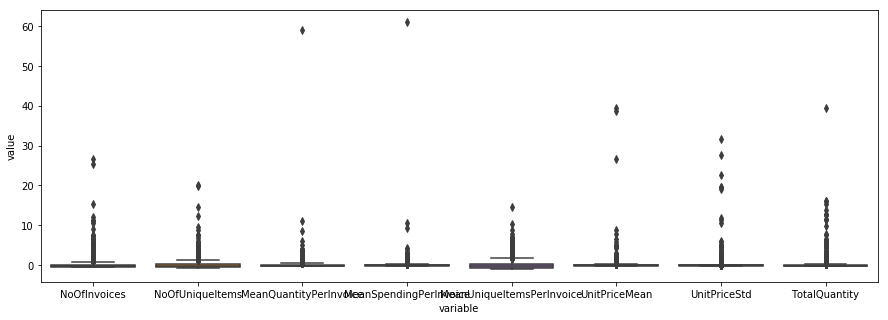

In [136]:
plt.figure(figsize=(15,5))
sns.boxplot(x="variable", y="value", data=pd.melt(customer_norm))
plt.show()

In [139]:
outliers = np.empty((0,1))
for i in range(customer_norm.shape[1]):
    temp = customer_norm.iloc[:,i].quantile([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
    outliers = np.append(outliers, np.array(customer_norm[customer_norm.iloc[:,i]>temp[0.95]].index))

In [140]:
outliers = np.unique(outliers)
len(outliers)

959

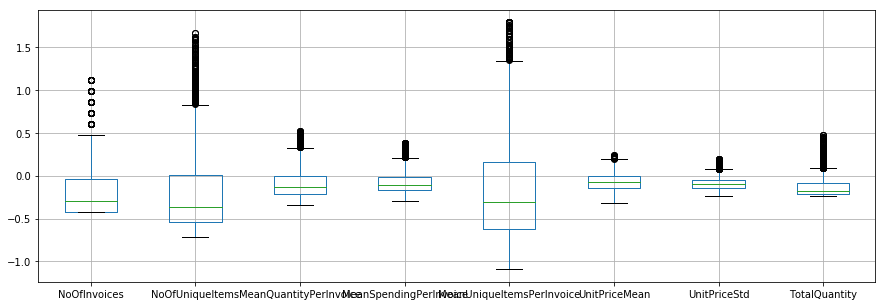

In [141]:
customer_norm_core = customer_norm[~np.isin(customer_norm.index,outliers)]
customer_norm_outlier = customer_norm[np.isin(customer_norm.index,outliers)]
plt.figure(figsize=(15,5))
#sns.boxplot(x="variable", y="value", data=pd.melt(customer_norm_core))
#plt.show()
customer_norm_core.boxplot()

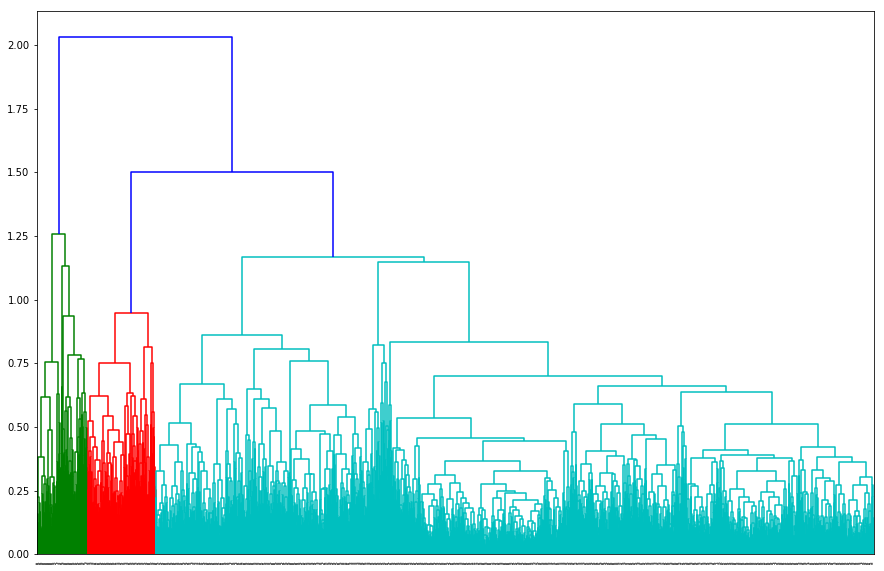

In [142]:
customer_link = linkage(customer_norm_core, "average")
plt.figure(figsize=(15,10))
dendrogram(customer_link, leaf_font_size=0.1)
plt.show()


In [152]:
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    gmm = GaussianMixture(n_components=i, max_iter=1000)
    customer_km = km.fit(customer_norm_core)
    customer_km_sil[i-2] = silhouette_score(customer_norm_core, customer_km.labels_)
    customer_gmm = gmm.fit(customer_norm_core)
    customer_gmm_sil[i-2] = silhouette_score(customer_norm_core, customer_gmm.predict(customer_norm_core))

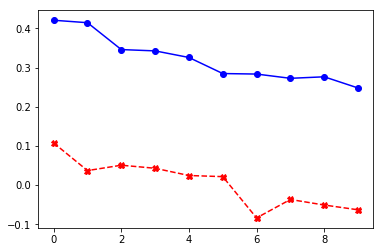

In [153]:
fig = plt.figure()
plt.plot(range(0,10), customer_km_sil, 'b-', marker='o', linestyle='-')
plt.plot(range(0,10), customer_gmm_sil, 'r-', marker='X', linestyle='--')

In [154]:
# choose a value of k=3 for KMeans
km = KMeans(n_clusters=3, max_iter=1000)
customer_km = km.fit(customer_norm_core)

In [155]:
pd.Series(customer_km.labels_).value_counts()

2    1990
1     754
0     564
dtype: int64

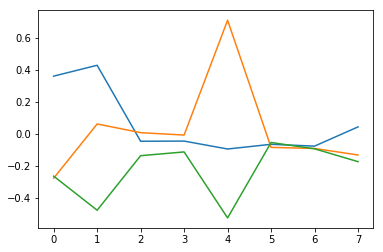

In [157]:
# centroids cluster close together for some variables but are far apart for other variables. 
# the variables with centroids further apart are probably more informative variables 
for i in range(km.n_clusters):
    plt.plot(customer_km.cluster_centers_[i,:])

### Validating clusters  

1. Use at least three techniques to validate that your chosen clusters correspond to meaningful customer segments. You may consider a combination of using visualisations and/or quantitative metrics (refer to Elements of Statistical Learning for some examples)

Hierarchical Clustering - cophenetic correlation coefficient measures how well the structure of the tree corresponds to the structure of the data. Labelling tree leaves with feature attributes will also show whether data are clustered meaningfully in feature space.

K-Means and GMM - one possibility is to reduce high dimensional data (with cluster labels) to fewer dimensions with PCA, then plotting the data in lower dimensional space and coloring the data by cluster label. 

There are also many many measures that measure what the optimal number of clusters are.  variance_explained, WCSSE (within-cluster-sum-of-squared-error), dissimilarity, silhouette, distortion_fK, AIC, BIC and Adjusted_Rsquared. This notebook uses silhouette, but here's an example of how distortion_fK is used. 

![alt text](distort_fK.png)

### Model selection

1. Explain when it is appropriate to use K-Means, GMM and Hierarchical Clustering 
2. Which model would you choose for this dataset? 

`1. K means are good for circular clusters. Variables should be on the same scale otherwise the variable with the larger 
scale will dominate 
2. GMMs are useful if clustering boundaries need to be softer 
3. Hierarchical clustering can show subgroups within the main clusters. lengths of branches also give an indication of distance 

I would personally go with HClust for the dataset because the dendrogram is interpretable.` 

### Opening the black box of clustering [reference pg 503](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. In your own words, explain the broad idea behind building a proximity matrix to cluster data. (This should also be verbally presented during Monday's presentation). 
*Sometimes, typing values into MS Excel helps with building intuition

2. In your own words, how would you calculate the disimilarity between objects in a dataset? (This should also be verbally presented during Monday's presentation)

### PCA for Dimensionality Reduction 

1. Using the dataset that you have pre-processed, construct a pairplot again. How is it different from the a plot of the raw data and what is your interpretation?  
2. Apply PCA pre-processed dataset. More information on PCA here [link]
3. Create a plot of cumulative explained variance and number of components. How does this inform you about the best number of components to select? 
4. Create a plot of PC0 against PC1, coloured by the GMM's predictions on the normalised dataset with outliers removed for n_components =7
5. How would you connect the Princip